Exercises
Within your codeup-data-science directory, create a new directory named classification-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub. Make sure to add a .gitignore file. In your .gitignore, ignore .DS_Store, .ipynb_checkpoints/, __pycache__, titanic.csv, iris.csv, and env.py. Add and commit your .gitignore file before moving forward.

The end product of this exercise is a jupyter notebook (classification_exercises.ipynb) and acquire.py. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions.



In [1]:
# imports

import pandas as pd
import numpy as np
import os
from scipy import stats

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

import acquire
import prepare
import explore

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [3]:
# Create sql query and save to variable.

sql_query = 'SELECT * FROM measurements'

In [4]:
# Create connection url and save to a variable.

connection_url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

In [5]:

# Use my variables in the pandas read_sql() function.

df_iris = pd.read_sql(sql_query, connection_url)
df_iris.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


1a. print the first 3 rows


In [6]:
df_iris.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


1b. print the number of rows and columns (shape)

In [7]:
df_iris.shape

(150, 6)

1c. print the column names

In [8]:
df_iris.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id'],
      dtype='object')

1d. print the data type of each column

In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


1e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [10]:
df_iris.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [11]:
# I would recommend rounding down to 4 decimal places to make it easier to read / manipulate

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [12]:
# getting this set up

df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes


2a. assign the first 100 rows to a new dataframe, df_excel_sample

In [13]:
df_excel_sample = df_excel.head(100)

In [14]:
# checking my work...
df_excel_sample.shape

(100, 12)

2b. print the number of rows of your original dataframe

In [15]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


2c. print the first 5 column names

In [16]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

2d. print the column names that have a data type of object


In [17]:
df_excel.select_dtypes(['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [18]:
# what if I wanted multiple dtypes...
df_excel.select_dtypes(include=['object', 'bool']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

2e. compute the range for each of the numeric variables.


In [19]:
# give me a list of numeric columns
df_excel.select_dtypes(exclude=['object']).columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

In [20]:
df_excel.select_dtypes(exclude='object').max() - df_excel.select_dtypes(exclude='object').min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

3. Read the data from this google sheet into a dataframe, df_google

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'

In [22]:
csv_export_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv&gid=341089357')


In [23]:
df_google = pd.read_csv(csv_export_url)
df_google.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


3a. print the first 3 rows

In [24]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


3b. print the number of rows and columns

In [25]:
df_google.shape

(891, 12)

3c. print the column names

In [26]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3d. print the data type of each column

In [27]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3e. print the summary statistics for each of the numeric variables

In [28]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3f. print the unique values for each of your categorical variables

In [29]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [30]:
# how to get number of unique entries per column/Series
df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']).nunique()

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [31]:
df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])


,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [32]:
cats_only_df = df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])
cats_only_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [33]:
# Survived unique values...
cats_only_df['Survived'].unique()

array([0, 1])

In [34]:
# Pclass unique values
cats_only_df['Pclass'].unique()

array([3, 1, 2])

In [35]:
# Sex unique values
cats_only_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
# SibSp unique values
cats_only_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [37]:
# Parch unique values
cats_only_df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [38]:
# Embarked unique values
cats_only_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Make a new python module, acquire.py to hold the following data aquisition functions:

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [39]:
df_titanic = acquire.new_titanic_data()
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [40]:
df_iris = acquire.new_iris_data()
df_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [41]:
df_titanic_csv = acquire.get_titanic_data()
df_titanic_csv.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


## Prepare Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [42]:
# done above for previous exercises...
df_iris.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa


2. Drop the species_id and measurement_id columns.

In [43]:
# make a list of columns to drop

columns_to_drop = ['species_id', 'measurement_id']

In [44]:
# create a new df to check work (won't alter original df)

df_iris_clean = df_iris.drop(columns=columns_to_drop)
df_iris_clean.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


3. Rename the species_name column to just species.

In [45]:
df_iris_clean = df_iris_clean.rename(columns={'species_name': 'species'})
df_iris_clean.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


4. Create dummy variables of the species name.

In [46]:
dummy_df = pd.get_dummies(df_iris_clean[['species']], dummy_na=False, drop_first=True)
dummy_df.head(2)

,species_versicolor,species_virginica
0,0,0
1,0,0


In [47]:
df_iris_clean = pd.concat([df_iris_clean, dummy_df], axis=1)
df_iris_clean

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [48]:
def prep_iris(df):
    '''
    This function will acquire the iris_db from Codeup and 
    prepare the data to be split for train / validate / test
    '''
#     drop species_id and measurement columns
    df = df.drop(columns=(['species_id', 'measurement_id']))
# Rename the species_name column to just species.
    df = df.rename(columns={'species_name': 'species'})
#     Create dummy variables of the species name.
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=True)
# let's put it all together...
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [49]:
please_sweet_baby_jesus = prep_iris(df_iris)
please_sweet_baby_jesus

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


In [50]:
all_iris = acquire.get_iris_data()
all_iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [51]:
test = prep_iris(all_iris)
test

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


Exercises
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [52]:
# acquire iris data

iris_df = acquire.get_iris_data()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [53]:
# prep the data

iris_prep_df = prepare.prep_iris(iris_df)
iris_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_versicolor  150 non-null    uint8  
 6   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


In [54]:
# split the data

iris_train, iris_validate, iris_test = prepare.iris_split(iris_prep_df)

In [55]:
# what do they look like?
# training df
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 87 to 44
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [56]:
# validate df
iris_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 70 to 120
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        36 non-null     float64
 1   sepal_width         36 non-null     float64
 2   petal_length        36 non-null     float64
 3   petal_width         36 non-null     float64
 4   species             36 non-null     object 
 5   species_versicolor  36 non-null     uint8  
 6   species_virginica   36 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 1.8+ KB


In [57]:
# test df
iris_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 147 to 51
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        30 non-null     float64
 1   sepal_width         30 non-null     float64
 2   petal_length        30 non-null     float64
 3   petal_width         30 non-null     float64
 4   species             30 non-null     object 
 5   species_versicolor  30 non-null     uint8  
 6   species_virginica   30 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 1.5+ KB


2. Univariate Stats

2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [58]:
# what are the quantitative and categorical variables?

iris_cat_vars = ['species', 'species_versicolor', 'species_virginica']
iris_quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [59]:
# species hist




In [60]:
# species bar



2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [61]:
# iris_quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

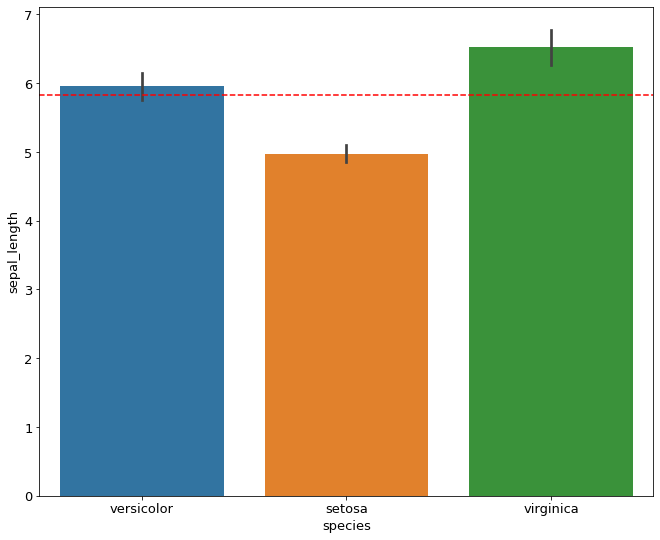

In [62]:
# sepal length
mean=iris_train['sepal_length'].mean()
tsl = sns.barplot(data = iris_train, y = 'sepal_length', x ='species' )
tsl.axhline(mean, color='r', linestyle='--')

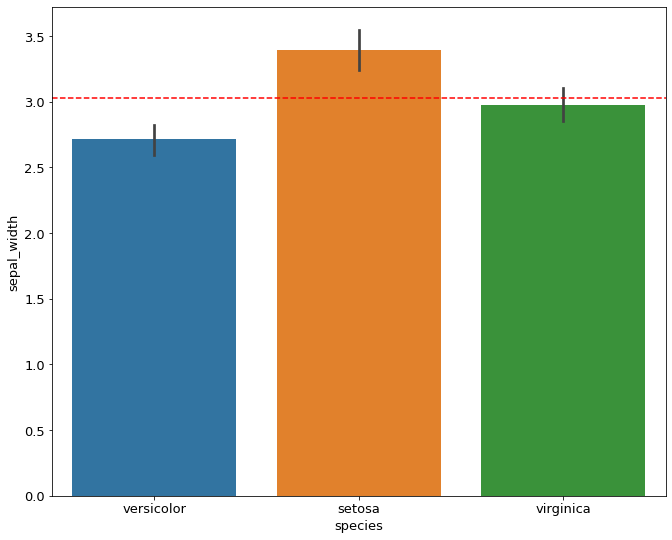

In [63]:
# sepal width
mean=iris_train['sepal_width'].mean()
tsw = sns.barplot(data = iris_train, y = 'sepal_width', x ='species' )
tsw.axhline(mean, color='r', linestyle='--')

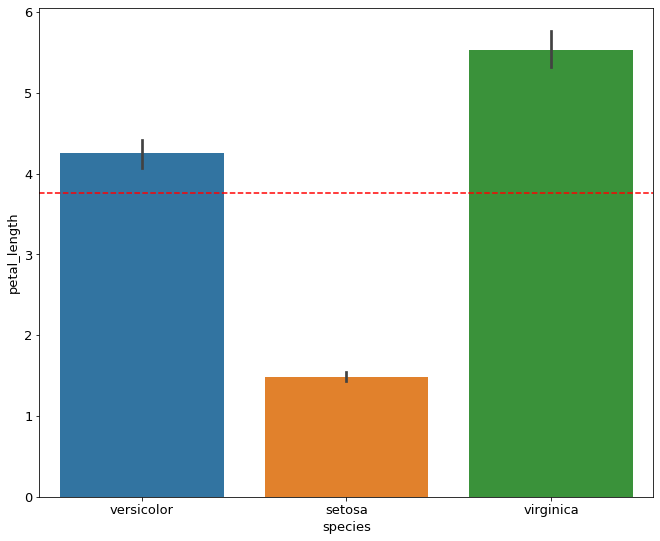

In [64]:
# petal length
mean=iris_train['petal_length'].mean()
tpl = sns.barplot(data = iris_train, y = 'petal_length', x ='species' )
tpl.axhline(mean, color='r', linestyle='--')

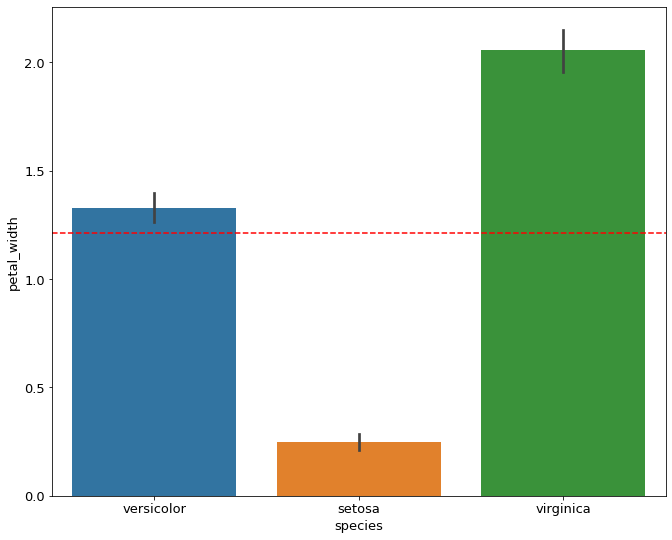

In [65]:
# petal width
mean=iris_train['petal_width'].mean()
tpw = sns.barplot(data = iris_train, y = 'petal_width', x ='species' )
tpw.axhline(mean, color='r', linestyle='--')

2c. Document takeaways & any actions.

3. Bivariate Stats

3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

3b. For each measurement type, compute the descriptive statistics for each species.



3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

3d. Document takeaways & any actions.



4. Multivariate Stats

4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

4b. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

4c. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



4d. Document takeaways and any actions.

In [66]:
# here are the questions from Madeleine's Lesson

Exercises
Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.



In [67]:
# look at the steps from the curriculum exercises
# iris_train
# iris_validate
# iris_test

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [68]:
# make sure to only explore data in the iris_train df.
# what does it look like?

iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
87,6.3,2.3,4.4,1.3,versicolor,1,0
32,5.2,4.1,1.5,0.1,setosa,0,0
142,5.8,2.7,5.1,1.9,virginica,0,1
31,5.4,3.4,1.5,0.4,setosa,0,0
42,4.4,3.2,1.3,0.2,setosa,0,0


In [69]:
# melt it like a grilled cheese

iris_train_num_melt = iris_train[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].melt(id_vars = ['species'],
                         var_name = 'measurement',
                         value_name = 'value')
iris_train_num_melt

,species,measurement,value
0,versicolor,sepal_length,6.3
1,setosa,sepal_length,5.2
2,virginica,sepal_length,5.8
3,setosa,sepal_length,5.4
4,setosa,sepal_length,4.4
...,...,...,...
331,versicolor,petal_width,1.4
332,versicolor,petal_width,1.7
333,virginica,petal_width,2.0
334,setosa,petal_width,0.1


In [75]:
# fancy matplotlib formatting for the notebook...

plt.rc('font', size = 14)
plt.rc('figure', figsize = (14,10))

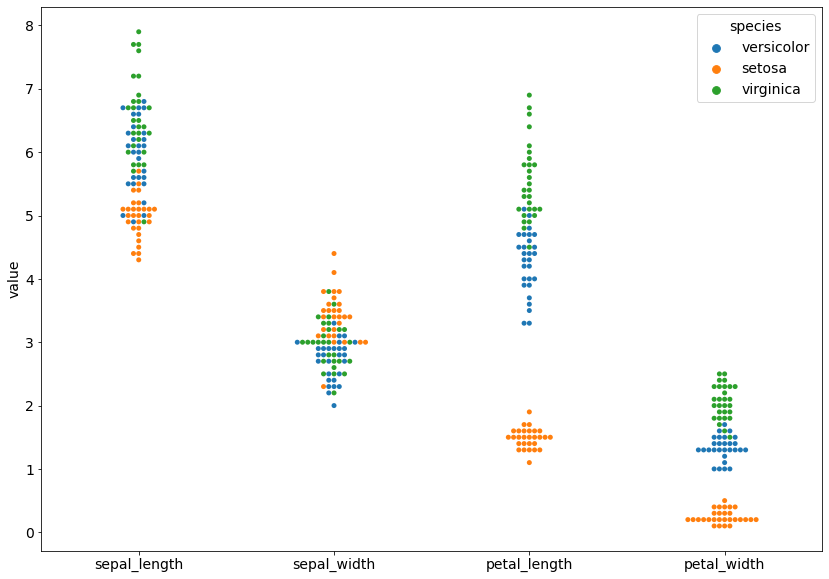

In [76]:
# swarm of bees

# plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x='measurement',
    y='value',
    hue='species',
    data=iris_train_num_melt,
)
p.set(xlabel='')
plt.show()

In [71]:
# what does it mean?

# sepal length might have some value, when used in conjunction with another, more segregated stat
# sepal lenth doesn't have enough stratification to be useful on its own


# sepal width is very congregated, and has little to no value

# petal length is great for identifying setosa, and should be useful in helping to ID versicolor and virginica

# petal width is also great for identifying setosa, and very useful in identifying versicolor and virginica



3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length



In [72]:
# new columns for area...

iris_train['sepal_area'] = iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area'] = iris_train['petal_length'] * iris_train['petal_length']

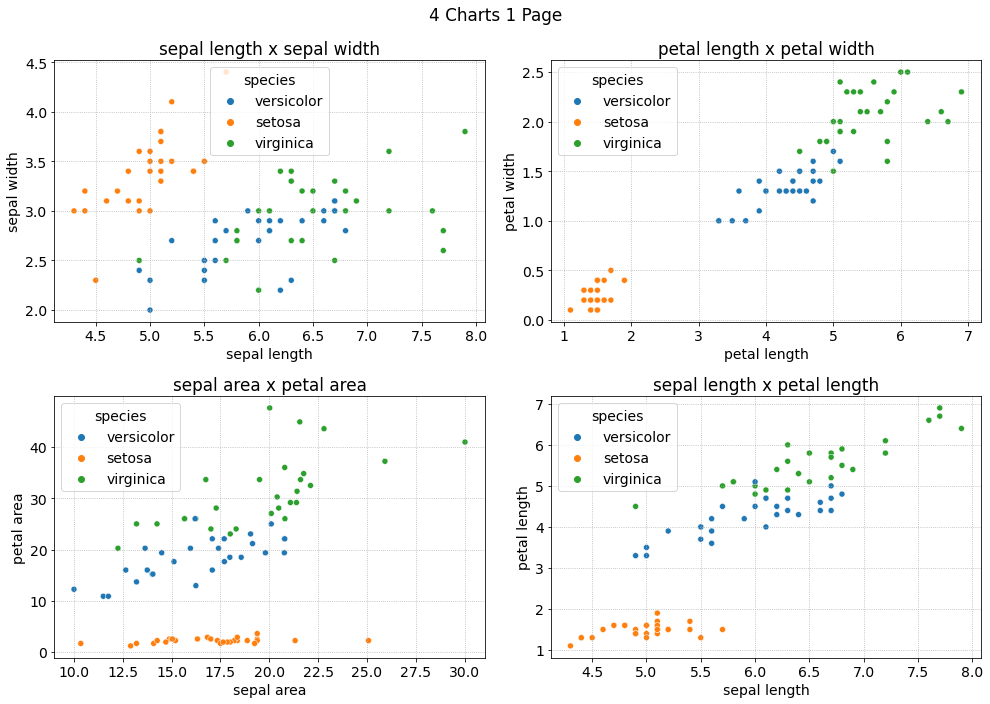

In [77]:
# initial formatting
# plt.figure(figsize=(12,8))
plt.suptitle('4 Charts 1 Page')
# sepal_length x sepal_width
x1 = iris_train['sepal_length']
y1 = iris_train['sepal_width']
# petal_length x petal_width
x2 = iris_train['petal_length']
y2 = iris_train['petal_width']
# sepal_area x petal_area
x3 = (iris_train['sepal_length'] * iris_train['sepal_width'])
y3 = (iris_train['petal_length'] * iris_train['petal_width'])
# sepal_length x petal_length
x4 = iris_train['sepal_length']
y4 = iris_train['petal_length']

# other stuff I need

species = iris_train['species']


# sepal_length x sepal_width
plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_train)

# petal_length x petal_width
plt.subplot(2,2,2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_train)

# sepal_area x petal_area
plt.subplot(2,2,3)
plt.title('sepal area x petal area')
plt.xlabel('sepal area')
plt.ylabel('petal area')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', data=iris_train)

# sepal_length x petal_length
plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_train)

# more formatting / let's see it
plt.tight_layout()
plt.show()

In [78]:
# how Madeleine did it...

combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [79]:
iris_train.groupby('species')['sepal_area'].sum()

species
setosa        475.66
versicolor    456.45
virginica     546.35
Name: sepal_area, dtype: float64

In [84]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x,y):
    for species, subset in iris_train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
    #     plt.show()

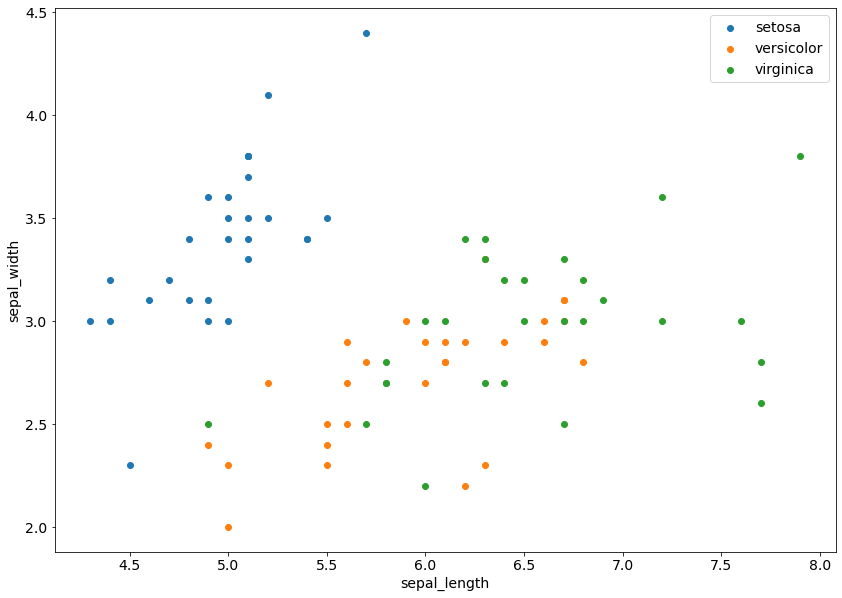

In [85]:
scatter_species(x,y)

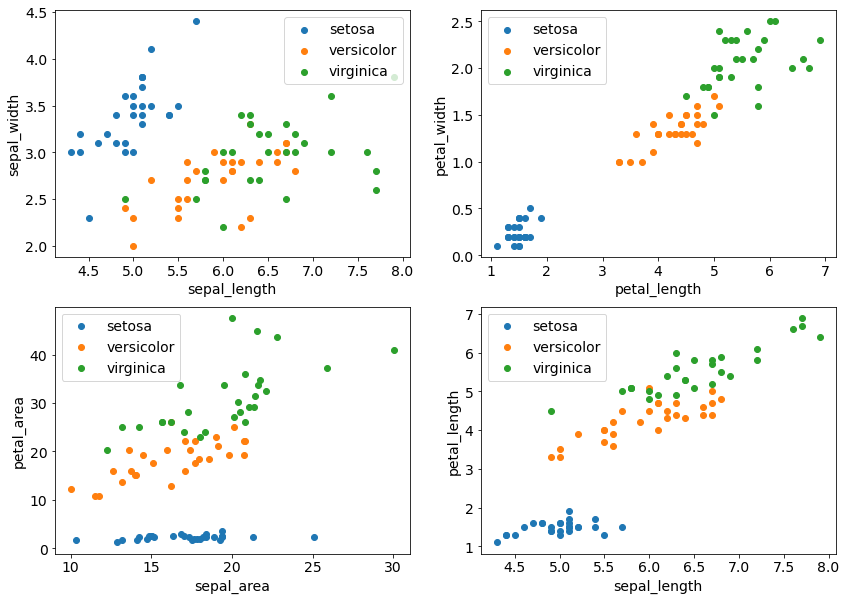

In [87]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])

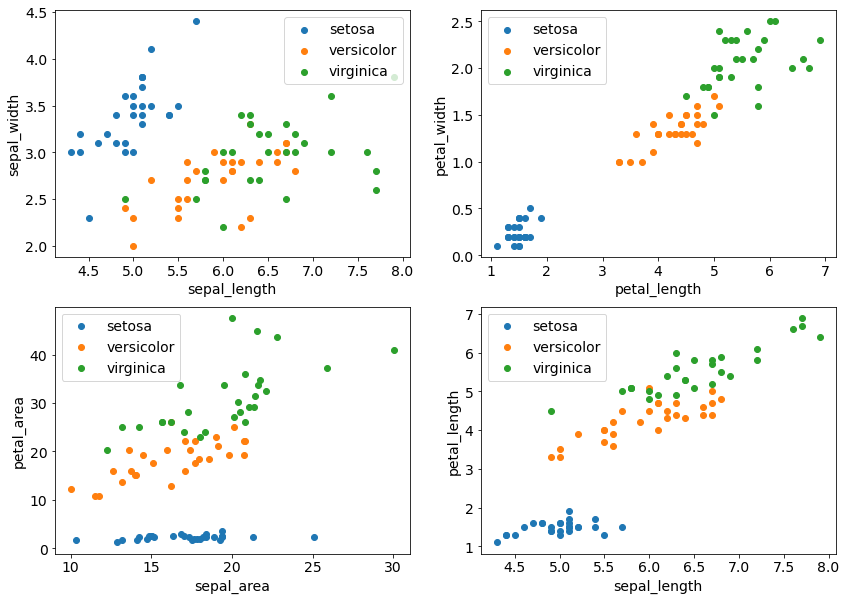

In [88]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])
    

What are your takeaways?

In [ ]:
# cannot add hue to subplot scatterplots in matplotlib
# make sure to use axis-levl (not figure-level) plots in Seaborn
# Need to find a way to do this more efficiently...
# setosa is quite unique from versicolor and virginica
# all charts can be used to detect setosa vs not setosa
# charts 2,3,4 can be used to detect all three species, 
# chart 1 has too much overlap to be useful for detecting virginia or versicolor

4. Create a heatmap of each variable layering correlation coefficient on top.

In [74]:
iris_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_versicolor', 'species_virginica', 'sepal_area', 'petal_area'],
      dtype='object')

In [89]:
iris_train.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica,sepal_area,petal_area
sepal_length,1.000000,-0.078566,0.873409,0.803680,0.114349,0.598826,0.681348,0.896855
sepal_width,-0.078566,1.000000,-0.385519,-0.325193,-0.484531,-0.089109,0.669776,-0.299512
petal_length,0.873409,-0.385519,1.000000,0.964647,0.201764,0.717489,0.373843,0.982927
petal_width,0.803680,-0.325193,0.964647,1.000000,0.108365,0.778256,0.371612,0.944750
species_versicolor,0.114349,-0.484531,0.201764,0.108365,1.000000,-0.500000,-0.263194,0.065426
species_virginica,0.598826,-0.089109,0.717489,0.778256,-0.500000,1.000000,0.387373,0.772302
sepal_area,0.681348,0.669776,0.373843,0.371612,-0.263194,0.387373,1.000000,0.452304
petal_area,0.896855,-0.299512,0.982927,0.944750,0.065426,0.772302,0.452304,1.000000


<AxesSubplot:>

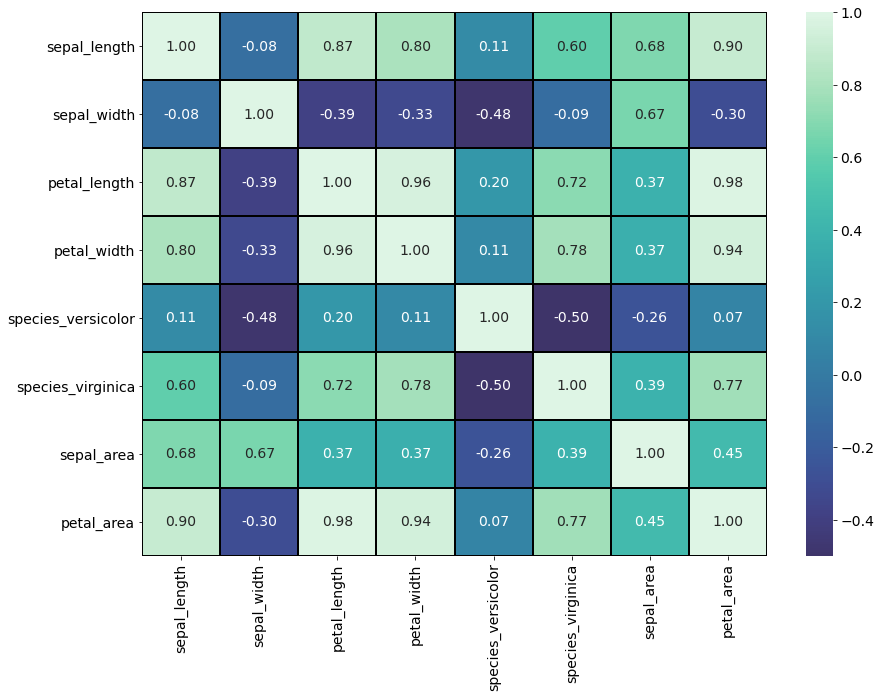

In [90]:
# what are we measuring???

sns.heatmap(iris_train.corr(), cmap='mako', center=0, linewidth= 1, linecolor= 'k', annot= True, fmt='.2f', )

5. Create a scatter matrix visualizing the interaction of each variable.

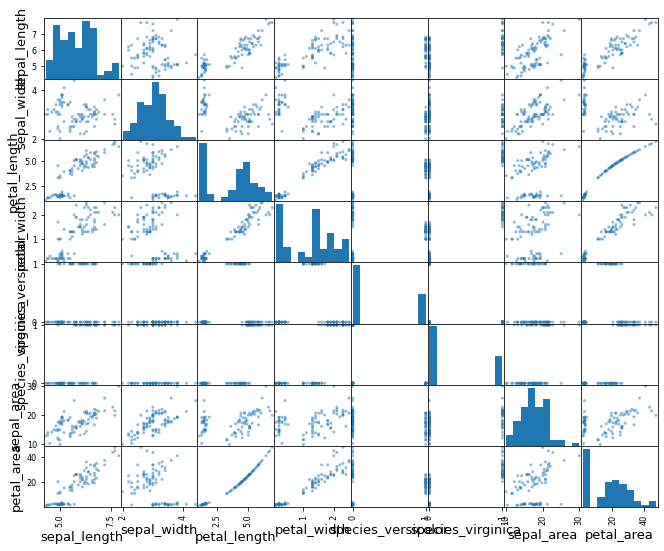

In [97]:
iris_scatter_matrix = pd.plotting.scatter_matrix(iris_train)

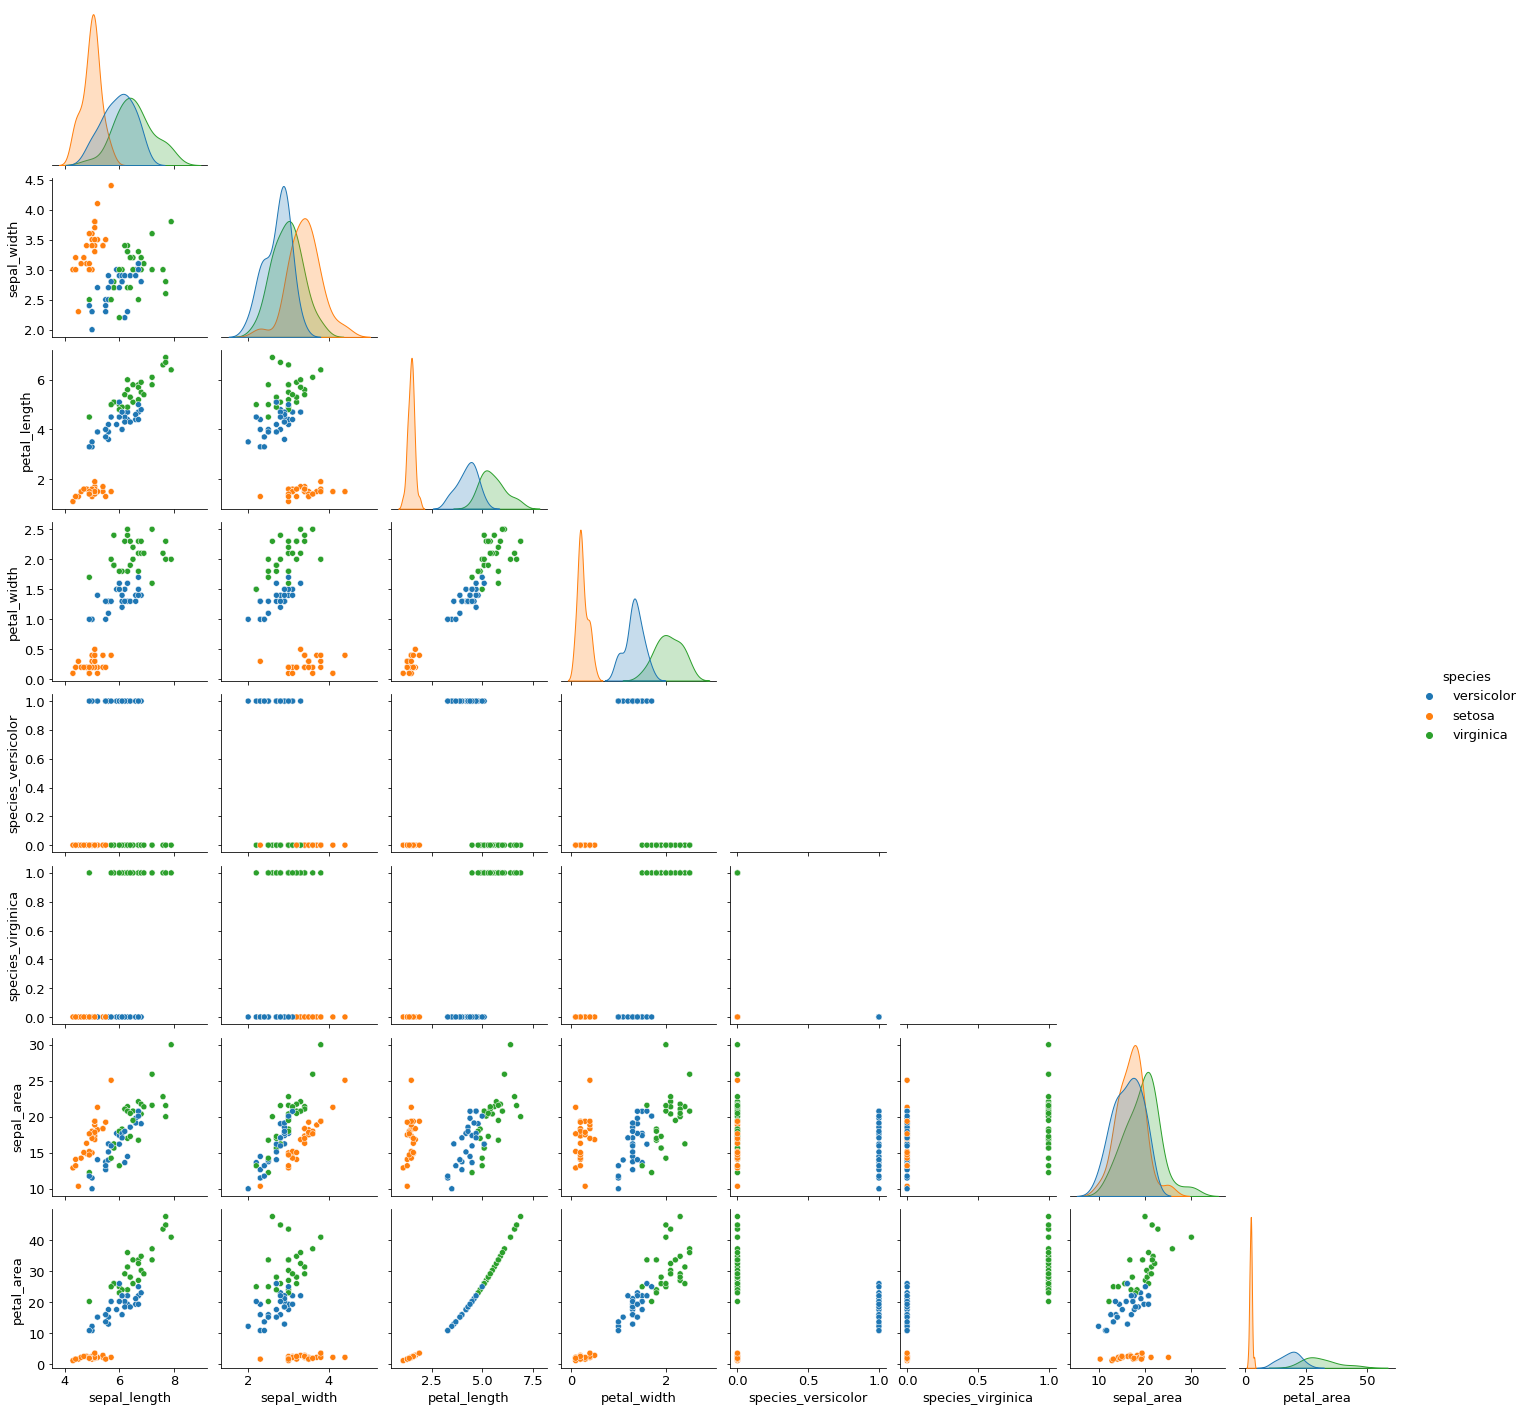

In [95]:
# pair plots for life

sns.pairplot(iris_train, hue='species', corner=True)

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- $H_{0}$: There is no difference between sepal length between virginica and versicolor
- $H_{0}$: There is a difference in sepal length between virginica and versicolor

In [99]:
alpha = 0.05
# 2 sample, 2 tailed ttest

In [101]:
sl_virginica = iris_train['sepal_length'][iris_train['species']=='virginica']
sl_versicolor = iris_train['sepal_length'][iris_train['species']=='versicolor']

In [105]:
t, p = stats.ttest_ind(sl_virginica, sl_versicolor, equal_var = True)

t, p, alpha

(3.4152403731889365, 0.0012167310933963353, 0.05)

In [106]:
t, p = stats.ttest_ind(sl_virginica, sl_versicolor, equal_var = False)

t, p, alpha

(3.4152403731889365, 0.0012491301040389266, 0.05)

In [107]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


6a. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

6b. What is your takeaway from this statistical testing?

In [109]:
# Much stronger difference in sepal length between virginica and versicolor than was apparent 
# in initial vizualisations

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [119]:
sa = iris_train['sepal_area'][iris_train['species']!='setosa']
pa = iris_train['petal_area'][iris_train['species']!='setosa']
vs = iris_train['species'][iris_train['species']!='setosa']

<AxesSubplot:xlabel='sepal_area', ylabel='species'>

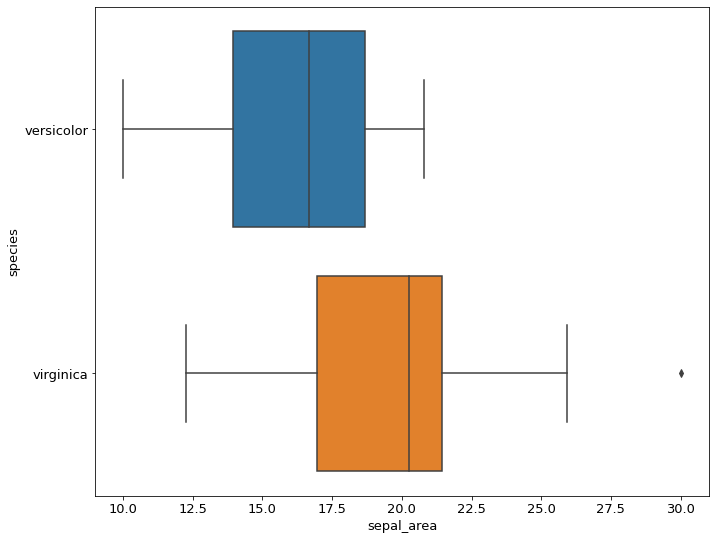

In [122]:
sns.boxplot(data=iris_train, y=vs, x=sa)

<AxesSubplot:xlabel='species', ylabel='petal_area'>

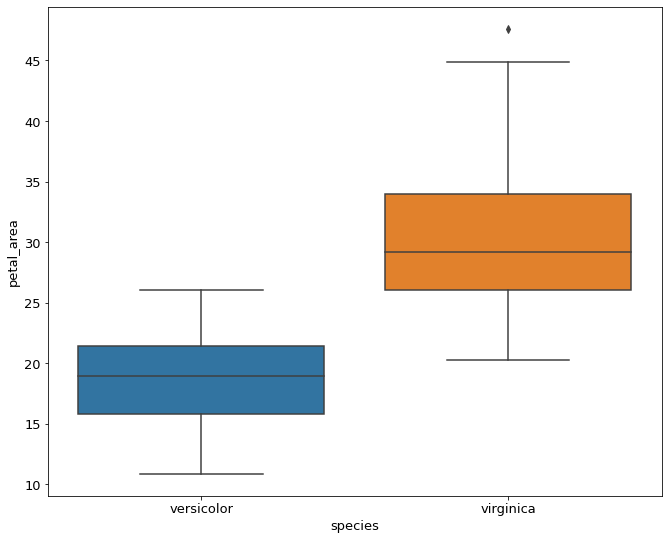

In [121]:
sns.boxplot(data=iris_train, x=vs, y=pa)